In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from filtered_point_process.PointProcess import PointProcessModel
from filtered_point_process.FPP import FilteredPointProcess

## Panel 3A in Bloniasz, Oyama, Stephen (2024)

In [ ]:
#### CIF Functions

# Parameters for the GABA simulation

# Define Simulation Method

params = {
    'method': 'AR(p)',
    'ar_coeffs': [1.9897557323136878, -0.9901],
    'white_noise_variance': 0.7,
    'fs': 1000,
    'T': 5,
    'Nsims': 1,
    'lambda_0': [150]
}


model_1 = PointProcessModel(params = params, seed=45)
model_1.simulate_pp()  # Simulate the CIF model for model_1

# Define the filters to be used
filters = {
    'GABA': 'GABA',
    '1/f': '1/f'
}

# Instantiate the FilteredPointProcess class with the specified filters and model
fpp = FilteredPointProcess(filters=filters, model=model_1)


In [3]:
# Panel 1 info

frequencies = np.abs(fpp.pp.params['frequencies'])

total_pp_PSD = fpp.model.pp_PSD

cif_PSD = fpp.model.cif_PSD

pp_rate = fpp.model.pp_PSD - fpp.model.cif_PSD

# Panel 2 info
spectra = fpp.get_spectra()
filters = fpp.get_filters()


total_1 = spectra['pp * GABA']
filtered_rate_1 = (pp_rate ) * filters['GABA']['power_spectrum']
filtered_cif_1 = (cif_PSD) * filters['GABA']['power_spectrum']


total_2 = spectra['pp * GABA * 1/f']
filtered_rate_2 = (pp_rate ) * filters['GABA']['power_spectrum'] * filters['1/f']['power_spectrum']
filtered_cif_2 = (cif_PSD ) * filters['GABA']['power_spectrum'] * filters['1/f']['power_spectrum']


def find_intersection(x, y1, y2):
    idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()
    return x[idx], y1[idx]

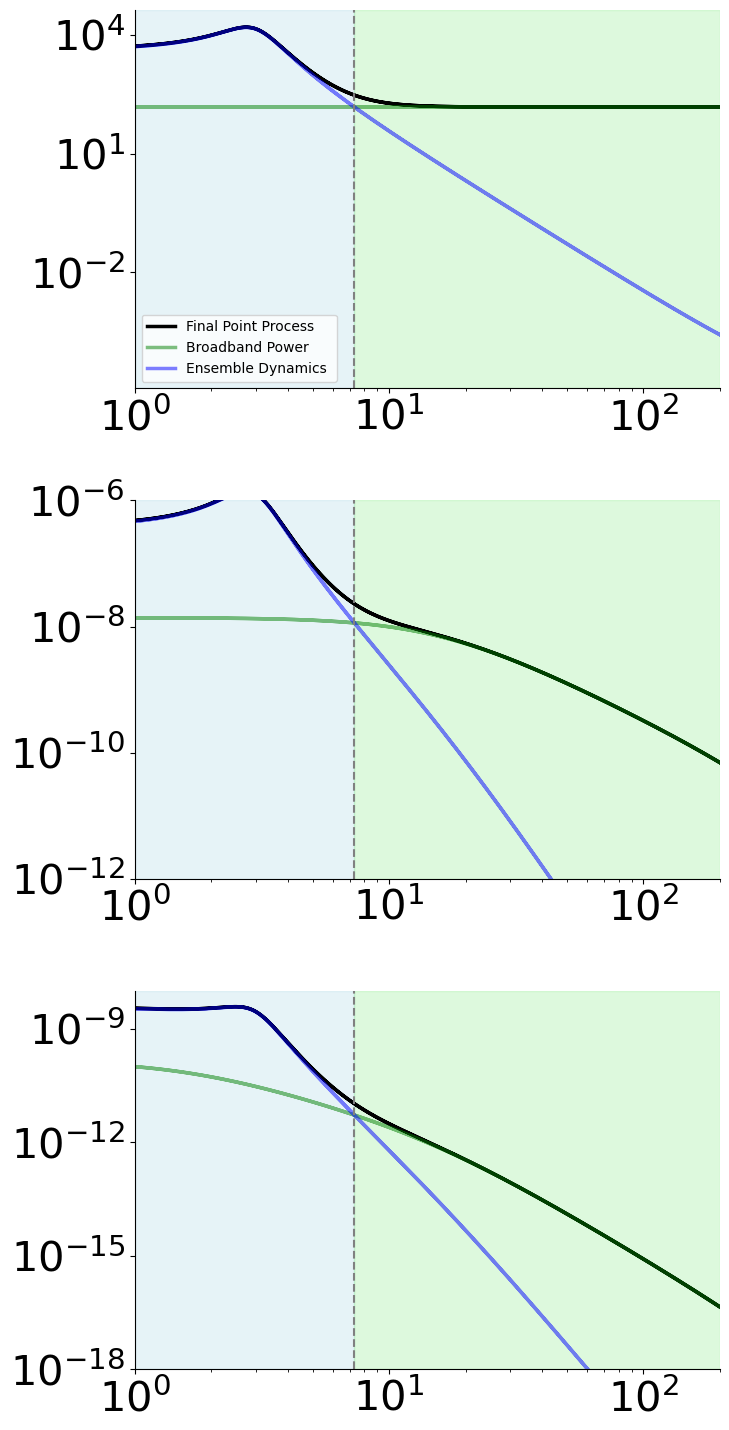

In [4]:
# Increase the global font size for all text in the plots
plt.rcParams['font.size'] = 30  
plt.rcParams['axes.titlesize'] = 30  # For subplot titles
plt.rcParams['axes.labelsize'] = 30  # For x and y labels
plt.rcParams['xtick.labelsize'] = 30  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 30 # For y-axis tick labels
plt.rcParams['legend.fontsize'] = 10  # For legend text

fig, axs = plt.subplots(3, 1, figsize=(8, 15))


# Panel 1
axs[0].loglog(frequencies, total_pp_PSD, label='Final Point Process', color = 'black', linewidth=2.5)
axs[0].loglog(frequencies, pp_rate, label='Broadband Power', color = 'green', alpha=0.5, linewidth=2.5)
axs[0].loglog(frequencies, cif_PSD , label='Ensemble Dynamics ', color = 'blue', alpha=0.5, linewidth=2.5)
axs[0].set_xlim([1, 200])
#axs[0].set_ylim([50, 2000])
axs[0].legend(loc = 'lower left')

# Intersection for Panel 1
x_inter, _ = find_intersection(frequencies, cif_PSD, pp_rate)
if x_inter.size > 0:
    axs[0].axvline(x=x_inter[0], color='gray', linestyle='--')  # Plot only the first intersection
    axs[0].axvspan(1, x_inter[0], color='lightblue', alpha=0.3)
    axs[0].axvspan(x_inter[0], 200, color='lightgreen', alpha=0.3)

# Panel 2
axs[1].loglog(frequencies, total_1, label='Final Point Process (PSP filter)', color = 'black', linewidth=2.5)
axs[1].loglog(frequencies, (filtered_rate_1 / params['fs']**2), label='Broadband Power (PSP filter)', color = 'green', alpha = 0.5, linewidth=2.5)
axs[1].loglog(frequencies, (filtered_cif_1/params['fs']**2), label='Ensemble Dynamics  (PSP filter)', color = 'blue', alpha = 0.5, linewidth=2.5)


axs[1].set_xlim([1, 200])
axs[1].set_ylim([1e-12, 1e-6])
#axs[1].legend(loc = 'lower left')

# Intersection for Panel 2
x_inter, _ = find_intersection(frequencies, filtered_rate_1, filtered_cif_1)
if x_inter.size > 0:
    axs[1].axvline(x=x_inter[0], color='gray', linestyle='--')
    axs[1].axvspan(1, x_inter[0], color='lightblue', alpha=0.3)
    axs[1].axvspan(x_inter[0], 200, color='lightgreen', alpha=0.3)

# Panel 3
axs[2].loglog(frequencies, total_2, label='Final Point Process (PSP and 1/f filter)', color = 'black', linewidth=2.5)
axs[2].loglog(frequencies, (filtered_rate_2/params['fs']**2), label='Broadband Power (PSP and 1/f filter)', color = 'green', alpha = 0.5, linewidth=2.5)
axs[2].loglog(frequencies, (filtered_cif_2/params['fs']**2), label='Ensemble Dynamics (PSP and 1/f filter)', color = 'blue', alpha = 0.5, linewidth=2.5)
axs[2].set_xlim([1, 200])
axs[2].set_ylim([1e-18, 1e-8])
#axs[2].legend(loc = 'lower left')

# Intersection for Panel 3
x_inter, _ = find_intersection(frequencies, filtered_rate_2, filtered_cif_2)
if x_inter.size > 0:
    axs[2].axvline(x=x_inter[0], color='gray', linestyle='--')
    axs[2].axvspan(1, x_inter[0], color='lightblue', alpha=0.3)
    axs[2].axvspan(x_inter[0], 200, color='lightgreen', alpha=0.3)

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()
